# Crypto Fear and Greed Index correlation with Crypto Market

Get BTC price data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import sys
sys.path.append('../src')
from lib.data_load.csvs import get_asset_price_history
from lib.strategies import WeeklyFNGDCA

sns.set_theme(style="whitegrid")


# Set experiment parameters

START = "2017-01-01"
END = "2022-05-08"
ASSET = "BTC"
WEEKLY_INVESTMENT = 100

# Collect BTC data

df = get_asset_price_history(ASSET, START, END)


Join FNG with BTC data

In [14]:
df = WeeklyFNGDCA(WEEKLY_INVESTMENT, "Tuesday").preprocess(df)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,FNG,FNGClass,day_of_week
Date,,,,,,,,,
2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490,21.0,Extreme Fear,Wednesday
2022-05-05,39695.746094,39789.281250,35856.515625,36575.140625,36575.140625,43106256317,27.0,Fear,Thursday
2022-05-06,36573.183594,36624.359375,35482.132813,36040.921875,36040.921875,37795577489,22.0,Extreme Fear,Friday
2022-05-07,36042.503906,36129.925781,34940.824219,35501.953125,35501.953125,24375896406,23.0,Extreme Fear,Saturday
2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,36763041910,18.0,Extreme Fear,Sunday


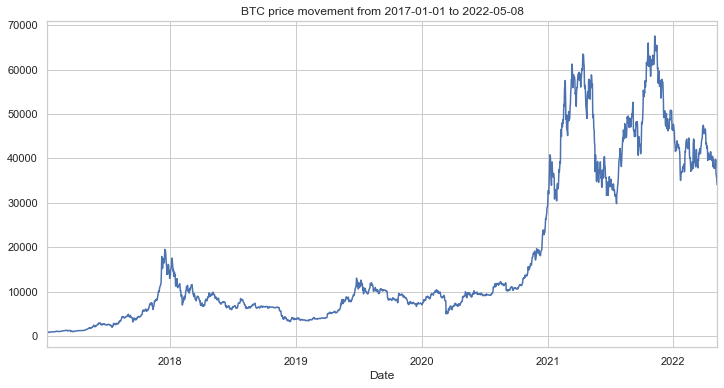

Text(0.5, 1.0, 'Fear and Greed Index values from 2017-01-01 to 2022-05-08')

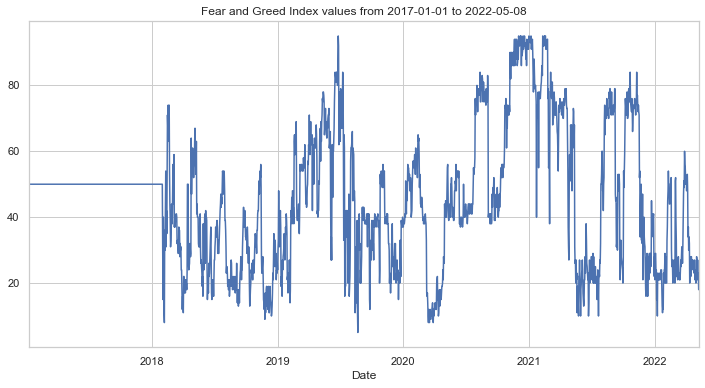

In [15]:

df.Close.plot(figsize=(12, 6))
plt.title(f"{ASSET} price movement from {START} to {END}")
plt.show()

df.FNG.plot(figsize=(12, 6))
plt.title(f"Fear and Greed Index values from {START} to {END}")

In [16]:
df = df.assign(relative_price_change=(df.Close - df.Close.rolling(window=30).mean())/df.Close.rolling(window=30).mean())
df = df.assign(relative_fng=(df.FNG - 50) / 50)

## FNG Correlation with BTC Price overtime

  0%|          | 0/1580 [00:00<?, ?it/s]

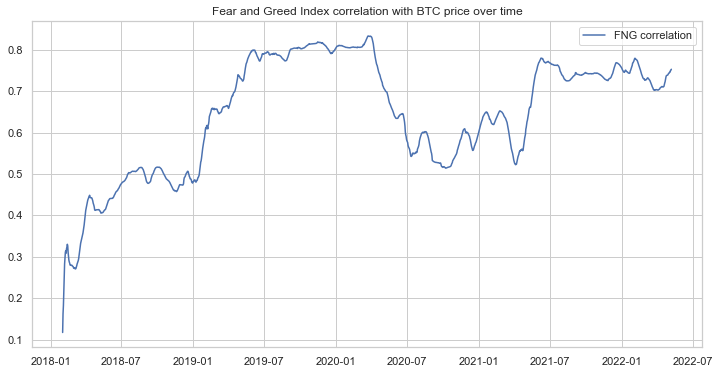

In [22]:
all_dates = pd.date_range(df.index.min(), df.index.max())
WINDOW_LENGTH = 365

dates = []
fng_correlation = []

for i in tqdm(range(len(all_dates) - WINDOW_LENGTH - 1)):
    start = all_dates[i]
    end = all_dates[i + WINDOW_LENGTH]
    df_window = df[start:end]
    dates.append(end)
    fng_correlation.append(df_window.corr()["relative_fng"]["relative_price_change"])

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(dates, fng_correlation, label="FNG correlation")
ax.set_title("Fear and Greed Index correlation with BTC price over time")
ax.legend()